In [755]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import cv2

In [756]:
# polygon room generate
# -*- coding: utf-8 -*-
import numpy as np


def uniform_random(left, right, size=None):
    """
    generate uniformly distributed random numbers in [left, right)

    Parameters:
    -----------
    left: a number
        left border of random range
    right: a number
        right border of random range
    size: a number or a list/tuple of numbers
        size of output

    Returns:
    --------
    rand_nums: ndarray
        uniformly distributed random numbers
    """
    rand_nums = (right - left) * np.random.random(size) + left
    return rand_nums


def random_polygon(edge_num, center, radius_range):
    """
    generate points to construct a random polygon

    Parameters:
    -----------
    edge_num: a number
        edge numbers of polygon
    center: a list/tuple contain two numbers
        center of polygon
    radius_range: a list/tuple containing two numbers
        range of distances from center to polygon vertices

    Returns:
    --------
    points: ndarray
        points that can construct a random polygon
    """
    angles = uniform_random(0, 2 * np.pi, edge_num)
    angles = np.sort(angles)
    random_radius = uniform_random(radius_range[0], radius_range[1], edge_num)
    x = np.cos(angles) * random_radius
    y = np.sin(angles) * random_radius
    x = np.expand_dims(x, 1)
    y = np.expand_dims(y, 1)

    points = np.concatenate([x, y], axis=1)
    points += np.array(center)

    return points


def get_line_func(x_1,y_1,x_2,y_2):

    A = y_2-y_1
    B = x_1-x_2
    C = x_2*y_1 - x_1*y_2

    return A,B,C


def get_dist(A,B,C,x_1,y_1):

    dist = math.fabs(A*x_1+B*y_1+C) / math.sqrt(A*A + B*B)

    return dist


def draw_polygon(grid_data,points,line_size,class_id):


    for i in range(points.shape[0]):

        point1 = points[i]
        point2 = points[i-1]

        print(point1)
        print(point2)

        x_min = math.floor(min(point1[0],point2[0]))
        x_max = math.ceil(max(point1[0],point2[0]))
        y_min = math.floor(min(point1[1],point2[1]))
        y_max = math.ceil(max(point1[1],point2[1]))


        print(x_min,x_max,y_min,y_max)

        A,B,C = get_line_func(point1[0],point1[1],point2[0],point2[1])

        for x in range(x_min-line_size,x_max+line_size):
            for y in range(y_min-line_size,y_max+line_size):

                dist = get_dist(A,B,C,x+0.5,y+0.5)

                if dist < line_size:
                    grid_data[x][y] = class_id

    
    return grid_data

    

def polygon_pipeline():

    
    #初始化grid
    room_size = 256

    grid_data = [[0]*room_size]*room_size
    grid_data = np.array(grid_data)

    #画墙壁
    padding_coef = 0.1

    room_size = grid_data.shape[0]
    pad_size = math.floor(room_size * padding_coef)
    room_nopad = room_size - pad_size*2

    edge_num = random.randint(5,10)
    points = random_polygon(edge_num, [80, 80], [20, 80])

    points -= (points.max(0) + points.min(0))/2

    x_range,y_range = points.max(0) - points.min(0)
    scale = room_nopad / max(x_range,y_range)
    points *= scale

    points += room_size/2

    grid_display = draw_polygon(grid_data,points,3,1)


    # show demo of sampled area
    plt.figure()
    plt.imshow(np.squeeze(grid_display), aspect='equal', cmap='gray')
    plt.xlabel('x-position [m]')
    plt.ylabel('y-position [m]')
    plt.title('generated room')
    plt.show()

    

def try_add_obstacle(grid_data,valid_mask,class_id,minimun_gap = 10):

    x_range = grid_data.shape[0]
    y_range = grid_data.shape[1]


    x_size = random.randint(2,math.floor(x_range/10))
    y_size = random.randint(2,math.floor(y_range/10))

    x_pos = random.randint(x_size + minimun_gap, x_range - x_size - minimun_gap)
    y_pos = random.randint(y_size + minimun_gap, x_range - y_size - minimun_gap)

    # print(x_pos,y_pos)
    # print(x_size,y_size)

    if valid_mask[x_pos][y_pos] != 1:
        return grid_data


    for x in range(x_pos - x_size - minimun_gap, x_pos + x_size + minimun_gap):
        for y in range(y_pos - y_size - minimun_gap, y_pos + y_size + minimun_gap):

            if grid_data[x][y] != 0:

                return grid_data
        
    for x in range(x_pos - x_size, x_pos + x_size):
        for y in range(y_pos - y_size, y_pos+y_size):

            grid_data[x][y] = class_id

    return grid_data



[174.8022609 112.8442928]
[177.20958572 103.47196343]
174 178 103 113
[129.96035897 155.06858497]
[174.8022609 112.8442928]
129 175 112 156
[112.90816573 193.41208198]
[129.96035897 155.06858497]
112 130 155 194
[106.61122931 172.93482529]
[112.90816573 193.41208198]
106 113 172 194
[ 82.53384615 164.6250998 ]
[106.61122931 172.93482529]
82 107 164 173
[ 25.         191.62333707]
[ 82.53384615 164.6250998 ]
24 83 164 192
[90.76892663 86.00934425]
[ 25.         191.62333707]
24 91 86 192
[197.5317871   64.44772391]
[90.76892663 86.00934425]
90 198 64 87
[231.          62.58791802]
[197.5317871   64.44772391]
197 231 62 65
[177.20958572 103.47196343]
[231.          62.58791802]
177 231 62 104


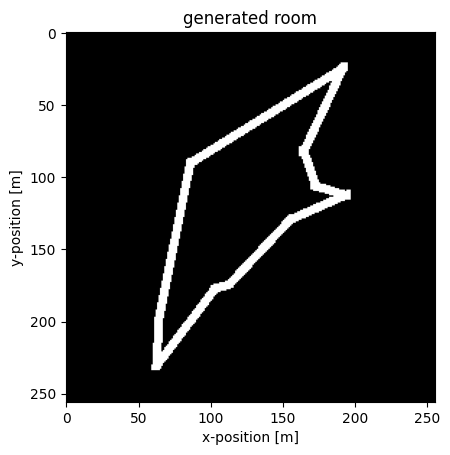

In [757]:
polygon_pipeline()

[177.57580652 192.00468233]
[203.4618312   73.26807676]
177 204 73 193
[175.87300527 203.98378977]
[177.57580652 192.00468233]
175 178 192 204
[110.07950327 223.71202915]
[175.87300527 203.98378977]
110 176 203 224
[ 88.93968828 231.        ]
[110.07950327 223.71202915]
88 111 223 231
[ 52.5381688  188.53500677]
[ 88.93968828 231.        ]
52 89 188 231
[56.34877445 70.75973599]
[ 52.5381688  188.53500677]
52 57 70 189
[64.34569935 48.4211548 ]
[56.34877445 70.75973599]
56 65 48 71
[90.36527134 45.90161186]
[64.34569935 48.4211548 ]
64 91 45 49
[106.27276382  25.        ]
[90.36527134 45.90161186]
90 107 25 46
[203.4618312   73.26807676]
[106.27276382  25.        ]
106 204 25 74


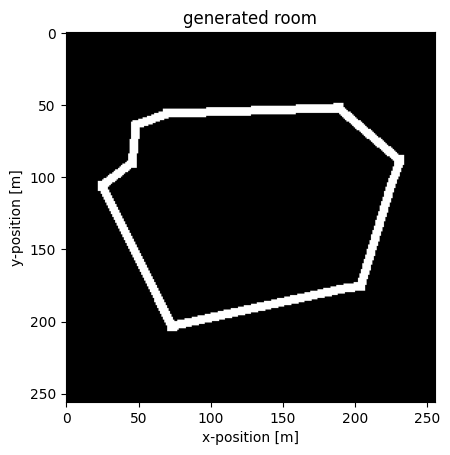

In [758]:
#初始化grid
room_size = 256

grid_data = [[0]*room_size]*room_size
grid_data = np.array(grid_data)

#画墙壁
padding_coef = 0.1

room_size = grid_data.shape[0]
pad_size = math.floor(room_size * padding_coef)
room_nopad = room_size - pad_size*2

edge_num = random.randint(5,10)
points = random_polygon(edge_num, [80, 80], [60, 80])

points -= (points.max(0) + points.min(0))/2

x_range,y_range = points.max(0) - points.min(0)
scale = room_nopad / max(x_range,y_range)
points *= scale

points += room_size/2


grid_display = draw_polygon(grid_data,points,3,1)



# show demo of sampled area
plt.figure()
plt.imshow(np.squeeze(grid_display), aspect='equal', cmap='gray')
plt.xlabel('x-position [m]')
plt.ylabel('y-position [m]')
plt.title('generated room')
plt.show()



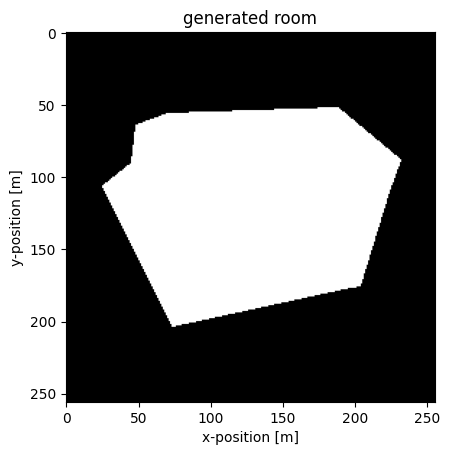

In [759]:

valid_mask = [[0]*room_size]*room_size
valid_mask = np.array(valid_mask)


# valid_mask = cv2.fillPoly(grid_display,np.int32([points]),1)

valid_mask = cv2.fillPoly(valid_mask,np.int32([points]),1)


valid_mask = np.transpose(valid_mask)

# show demo of sampled area
plt.figure()
plt.imshow(np.squeeze(valid_mask), aspect='equal', cmap='gray')
plt.xlabel('x-position [m]')
plt.ylabel('y-position [m]')
plt.title('generated room')
plt.show()



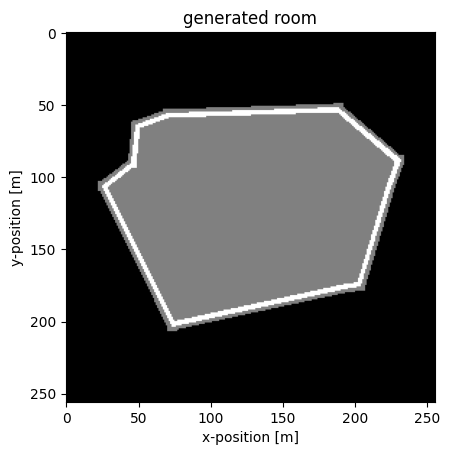

In [760]:


new_ing = valid_mask + grid_display


# show demo of sampled area
plt.figure()
plt.imshow(np.squeeze(new_ing), aspect='equal', cmap='gray')
plt.xlabel('x-position [m]')
plt.ylabel('y-position [m]')
plt.title('generated room')
plt.show()

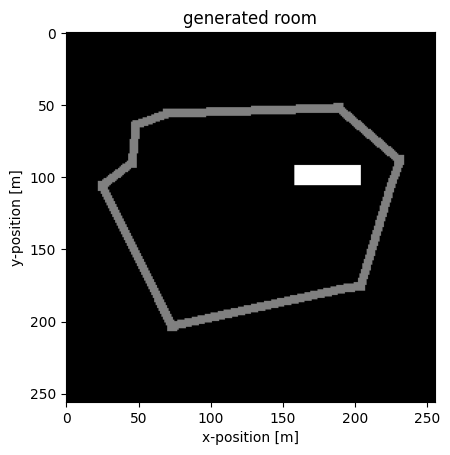

In [761]:

#生成障碍物

for _ in range(6):

    class_id =  random.randint(1,7)
    grid_data = try_add_obstacle(grid_data,valid_mask,class_id,5)


# show demo of sampled area
plt.figure()
plt.imshow(np.squeeze(grid_data), aspect='equal', cmap='gray')
plt.xlabel('x-position [m]')
plt.ylabel('y-position [m]')
plt.title('generated room')
plt.show()

In [47]:


u_mask = np.ones([256,256],dtype=bool)

ux = np.zeros([1,256,256])


In [48]:
ux_size = ux[0,:].size
# uy_size = uy[:, 0].size 
u_sum = np.sum(u_mask)

print(ux[0,:])
print(ux[0,:].shape)

print(ux.shape)

print(ux_size)
# print(uy_size)
print(u_sum)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(256, 256)
(1, 256, 256)
65536
65536


In [59]:
import h5py
with h5py.File('C:\\Users\\Administrator\\AppData\Local\\Temp\\13-Jun-2024-01-50-13_kwave_output.h5',"r") as f:
    for key in f.keys():
    	 #print(f[key], key, f[key].name, f[key].value) # 因为这里有group对象它是没有value属性的,故会异常。另外字符串读出来是字节流，需要解码成字符串。
        print(f[key], key, f[key].name) 
        print("----------")


    print(f["ux_source_flag"][0])

    print(f["u_source_many"][0])
    






<HDF5 dataset "Nt": shape (1, 1, 1), type "<u8"> Nt /Nt
----------
<HDF5 dataset "Nx": shape (1, 1, 1), type "<u8"> Nx /Nx
----------
<HDF5 dataset "Ny": shape (1, 1, 1), type "<u8"> Ny /Ny
----------
<HDF5 dataset "Nz": shape (1, 1, 1), type "<u8"> Nz /Nz
----------
<HDF5 dataset "absorbing_flag": shape (1, 1, 1), type "<u8"> absorbing_flag /absorbing_flag
----------
<HDF5 dataset "alpha_coeff": shape (1, 256, 256), type "<f4"> alpha_coeff /alpha_coeff
----------
<HDF5 dataset "alpha_power": shape (1, 1, 1), type "<f4"> alpha_power /alpha_power
----------
<HDF5 dataset "axisymmetric_flag": shape (1, 1, 1), type "<u8"> axisymmetric_flag /axisymmetric_flag
----------
<HDF5 dataset "c0": shape (1, 256, 256), type "<f4"> c0 /c0
----------
<HDF5 dataset "c_ref": shape (1, 1, 1), type "<f4"> c_ref /c_ref
----------
<HDF5 dataset "dt": shape (1, 1, 1), type "<f4"> dt /dt
----------
<HDF5 dataset "dx": shape (1, 1, 1), type "<f4"> dx /dx
----------
<HDF5 dataset "dy": shape (1, 1, 1), type "<

In [62]:
import h5py

h5_path = "C:\\Users\\Administrator\\AppData\\Local\\Temp13-Jun-2024-03-17-45_kwave_input.h5"



with h5py.File('C:\\Users\\Administrator\\AppData\Local\\Temp\\13-Jun-2024-03-17-45_kwave_input.h5',"r") as f:
    # for key in f.keys():
    # 	 #print(f[key], key, f[key].name, f[key].value) # 因为这里有group对象它是没有value属性的,故会异常。另外字符串读出来是字节流，需要解码成字符串。
    #     print(f[key], key, f[key].name) 
    #     print(f[key].shape)
    #     print("----------")

    p_data = f["p"]

    frames_num = p_data.shape[1]

    print(frames_num)
    

    print(p_data[1])




<HDF5 dataset "Nt": shape (1, 1, 1), type "<u8"> Nt /Nt
(1, 1, 1)
----------
<HDF5 dataset "Nx": shape (1, 1, 1), type "<u8"> Nx /Nx
(1, 1, 1)
----------
<HDF5 dataset "Ny": shape (1, 1, 1), type "<u8"> Ny /Ny
(1, 1, 1)
----------
<HDF5 dataset "Nz": shape (1, 1, 1), type "<u8"> Nz /Nz
(1, 1, 1)
----------
<HDF5 dataset "absorbing_flag": shape (1, 1, 1), type "<u8"> absorbing_flag /absorbing_flag
(1, 1, 1)
----------
<HDF5 dataset "axisymmetric_flag": shape (1, 1, 1), type "<u8"> axisymmetric_flag /axisymmetric_flag
(1, 1, 1)
----------
<HDF5 dataset "c_ref": shape (1, 1, 1), type "<f4"> c_ref /c_ref
(1, 1, 1)
----------
<HDF5 dataset "dt": shape (1, 1, 1), type "<f4"> dt /dt
(1, 1, 1)
----------
<HDF5 dataset "dx": shape (1, 1, 1), type "<f4"> dx /dx
(1, 1, 1)
----------
<HDF5 dataset "dy": shape (1, 1, 1), type "<f4"> dy /dy
(1, 1, 1)
----------
<HDF5 dataset "nonlinear_flag": shape (1, 1, 1), type "<u8"> nonlinear_flag /nonlinear_flag
(1, 1, 1)
----------
<HDF5 dataset "nonuniform_g

In [ ]:
可以试试流式读取
============
将 `.npy` 文件中的数据流式编码为 MP4 文件可以有效地避免显存溢出的问题。你可以使用流式操作，即一次加载一小部分数据进行处理，而不是一次性加载所有数据到内存中。下面我将展示如何使用 Python 和 OpenCV 将 `.npy` 数据流式地编码为 MP4 格式视频。

### 前提条件

确保你已经安装了所需的库，如果没有安装，可以使用以下命令进行安装：

pip install opencv-python numpy 


### 示例代码

假设 `.npy` 文件中的数据是一个4维的 NumPy 数组，维度分别为 `(num_frames, height, width, channels)`。

import numpy as np 
import cv2 

def stream_encode_to_mp4(npy_file, output_file, fps=30): 
 # 打开 NPY 文件用于读取 
 with open(npy_file, 'rb') as f: 
 # 读取第一帧以获取视频尺寸信息 
 first_frame = np.load(f) 
 height, width, channels = first_frame.shape 

 # 创建 VideoWriter 对象 
 fourcc = cv2.VideoWriter_fourcc(*'mp4v') # 使用 mp4 编码器 
 out = cv2.VideoWriter(output_file, fourcc, fps, (width, height)) 

 # 写入第一帧 
 out.write(cv2.cvtColor(first_frame, cv2.COLOR_RGB2BGR)) 

 # 逐帧读取 NPY 数据并写入视频文件 
 while True: 
 try: 
 # 读取下一帧 
 frame = np.load(f) 
 # 转换颜色通道并写入视频 
 out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)) 
 except ValueError: 
 # 当没有更多数据时跳出循环 
 break 

 # 释放 VideoWriter 对象 
 out.release() 
 print(f"Video has been written to {output_file}") 

# 示例用法 
stream_encode_to_mp4('input.npy', 'output.mp4', fps=30) 


### 详细说明：

打开 NPY 文件：
使用 `open(npy_file, 'rb')` 以二进制模式打开`.npy` 文件。
读取视频尺寸信息：
读取第一个帧以获取视频的尺寸信息（高度、宽度和通道数）。
创建 VideoWriter 对象：
使用 `cv2.VideoWriter` 创建 MP4 视频写入对象。
`fourcc = cv2.VideoWriter_fourcc(*'mp4v')` 指定使用 MP4 编码器。
`out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))` 创建输出视频文件。
逐帧读取并写入视频：
使用 `np.load(f)` 逐帧读取 `.npy` 数据。
使用 `cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)` 将帧从 RGB 转换为 BGR（OpenCV 使用 BGR 格式）。
使用 `out.write(frame)` 将转换后的帧写入视频文件。
使用 `try-except` 块处理文件末尾的情况，当读取完成时，跳出循环。
释放 VideoWriter 对象：
使用 `out.release()` 释放资源并保存视频文件。

### 注意事项：

数据格式：
确保 `.npy` 文件中的数据格式正确，例如 `(num_frames, height, width, channels)`，并且通道数应为3（RGB）。
如果数据不是以此维度排列，可能需要先对数据进行预处理。
显存管理：
此方法是流式读取和处理数据，避免一次性加载所有数据到内存中，从而有效地管理显存。
处理异常：
在处理过程中，确保正确处理可能出现的异常情况，例如文件读取错误等。

通过这种方法，你可以有效地将 `.npy` 数据流式编码为 MP4 格式，避免显存溢出的问题。如果你有其他具体需求或遇到问题，请随时告诉我！
如何在 Python 中使用 OpenCV 对视频进行编码和解码？
如何使用 OpenCV 将视频文件分割成多个帧？
有没有其他方法可以避免显存溢出问题而不需要流式编码？